# **Capitulo 5 – Decision Trees. End to End**

### Librerias

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

Los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [126]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y creemos la carpeta `images/decision_trees` (si no existe ya), y definamos la función `save_fig()` que se utiliza a través de este Notebook para guardar las figuras:

In [127]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "decision_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargamos datos

In [128]:
import pandas as pd
penguins = pd.read_csv("data/penguins_size.csv")

# Preprocesamiento

In [129]:
# analisis de variables

In [130]:
# borrar missing
penguins = penguins.dropna()

In [131]:
# tratar variables categorias
# species, islanda y sex


In [132]:
# Species
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
species = ordinal_encoder.fit_transform(penguins[["species"]])

In [133]:
# Island
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
island = cat_encoder.fit_transform(penguins[["island"]])


In [134]:
# Donde están los nombres de las categorias? Qué tipo de datos son?
isl = pd.DataFrame(island)
isl.columns = list(cat_encoder.categories_[0])

In [135]:
penguins = pd.merge(penguins, isl, left_index=True, right_index=True)

In [136]:
# Sex
sex = cat_encoder.fit_transform(penguins[["sex"]])

In [137]:
sex = pd.DataFrame(sex)
sex.columns = list(cat_encoder.categories_[0])

In [138]:
penguins = pd.merge(penguins, sex, left_index=True, right_index=True)

In [139]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.0,0.0,1.0,1.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.0,0.0,1.0,0.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,MALE,1.0,0.0,0.0,1.0,0.0
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,FEMALE,1.0,0.0,0.0,0.0,1.0
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,MALE,1.0,0.0,0.0,1.0,0.0
322,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,FEMALE,1.0,0.0,0.0,0.0,1.0


In [140]:
import pandas as pd
penguins = pd.read_csv("data/penguins_size.csv")

In [141]:
penguins = penguins.dropna()

In [142]:
penguins = penguins[penguins["sex"]!="."]

In [201]:
# Vamos a utilizar una pipeline para hacerlo todo
from sklearn.compose import ColumnTransformer


full_pipeline = ColumnTransformer(transformers=[
        ("ord", OrdinalEncoder(), ['species']),
        ("one", OneHotEncoder(), ['sex', "island"]),
    ])

penguins_prepared = full_pipeline.fit_transform(penguins)

In [219]:
# ¿Cómo obtenemos los nombres de las columnas?
full_pipeline.named_transformers_['ord'].categories_[0]


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [220]:
target = list(full_pipeline.named_transformers_['ord'].categories_[0])

In [217]:
full_pipeline.named_transformers_['one'].categories_[0]

array(['FEMALE', 'MALE'], dtype=object)

In [218]:
full_pipeline.named_transformers_['one'].categories_[1]

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

[('ord', OrdinalEncoder(), ['species']),
 ('one', OneHotEncoder(), ['sex', 'island']),
 ('remainder', 'drop', [2, 3, 4, 5])]

In [155]:
# convertir en dataframe
pipe = pd.DataFrame(penguins_prepared, columns=names)

In [ ]:
# Comprobar pipe y penguins contienen la misma información

In [ ]:
# Borrar las columnas originales del dataset
penguins.drop(["island", "sex"], axis=1, inplace=True)

In [156]:
# merge
penguins_pre = pd.merge(penguins, pipe, right_index=True, left_index=True)

In [158]:
penguins_pre.drop(columns=["species_x"], inplace=True)

In [183]:
X = penguins_pre.drop("species_y", axis =1)
y = penguins_pre["species_y"]

In [184]:
y

0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
328    2.0
329    2.0
330    2.0
331    2.0
332    2.0
Name: species_y, Length: 324, dtype: float64

In [186]:
# División train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
# Creamos y entrenamos el modelo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [272]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "penguins.dot"),
        feature_names=X_train.columns,
        class_names=target,
        rounded=True,
        filled=True
    )

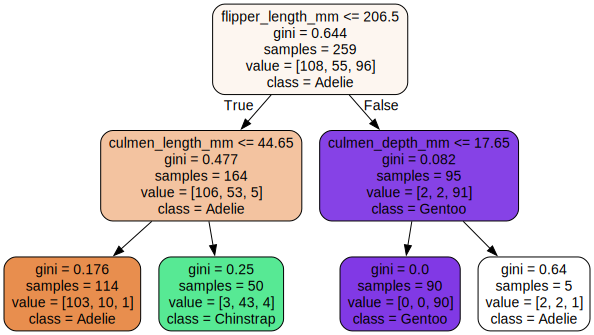

In [273]:
from graphviz import Source

Source.from_file("images/decision_trees/penguins.dot")

In [274]:
accuracy_score(y_train, tree_clf.predict(X_train))

0.918918918918919

In [234]:
# Calcular a mano

0.9189189189189189

In [276]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report


In [275]:
multilabel_confusion_matrix(y_train, tree_clf.predict(X_train))

array([[[137,  14],
        [  3, 105]],

       [[197,   7],
        [ 12,  43]],

       [[163,   0],
        [  6,  90]]], dtype=int64)

In [277]:
results = classification_report(y_train, tree_clf.predict(X_train), target_names=target, output_dict=True)


In [279]:
results["Adelie"]

{'precision': 0.8823529411764706,
 'recall': 0.9722222222222222,
 'f1-score': 0.9251101321585903,
 'support': 108.0}

In [280]:
results["Chinstrap"]

{'precision': 0.86,
 'recall': 0.7818181818181819,
 'f1-score': 0.819047619047619,
 'support': 55.0}

In [281]:
results["Gentoo"]

{'precision': 1.0,
 'recall': 0.9375,
 'f1-score': 0.967741935483871,
 'support': 96.0}

In [454]:
# Train vs test
print(accuracy_score(y_train, tree_clf.predict(X_train)))
print(accuracy_score(y_test, tree_clf.predict(X_test)))

0.918918918918919
0.9538461538461539


In [ ]:
# Suerte?  Misma distribución train test? 

In [298]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    strat_train_set = X.iloc[train_index]
    strat_train_y_set = y.iloc[train_index]
    strat_test_set = X.iloc[test_index]
    strat_test_y_set = y.iloc[test_index]

In [433]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(strat_train_set, strat_train_y_set)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 5, 10, 15, 20]},
                   random_state=42, scoring='accuracy')

In [434]:
# Mejores parámetros del modelo
random_search.best_params_

{'min_samples_leaf': 1, 'max_depth': 5}

In [436]:
# Mejor score (accuracy)
random_search.best_score_

0.9496229260935143

In [452]:
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 1, max_depth = 5)
tree.fit(strat_train_set, strat_train_y_set)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [455]:
print(accuracy_score(strat_train_y_set, tree.predict(strat_train_set)))

0.9845559845559846


In [450]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 1, max_depth = 5)

cv = cross_val_score(tree, strat_train_set, strat_train_y_set, scoring="accuracy")

cv.mean()

0.9496229260935143

In [448]:

print(random_search.best_score_)

0.9496229260935143

In [456]:
# Overfit?
print(random_search.best_score_)
print(accuracy_score(strat_test_y_set, tree.predict(strat_test_set)))

0.9496229260935143
0.8769230769230769


In [458]:
from sklearn.model_selection import RandomizedSearchCV
# Y si no fijo la semilla aquí??
tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(tree, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=42, # Semilla
                                   n_iter=10, # Nº de iteraciones del random search
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(strat_train_set, strat_train_y_set)
print(random_search.best_params_)
print(random_search.best_score_)

{'min_samples_leaf': 1, 'max_depth': 5}
0.9457767722473605
